In [1]:
import seaborn as sns
import pandas as pd
from time import time

from src.data.problem import Problem

from src.solvers.random_solver import RandomSolver
from src.solvers.greedy_solver import GreedySolver

from src.utils import calculate_costs


In [2]:
# special structure for problem
example_problem = Problem.from_example()

In [3]:
dataset_data_params = [(1, 5, 10, 10), (2, 5, 10, 10), (3, 5, 10, 10), 
                       (1, 5, 5, 5), (2, 5, 5, 5), (3, 5, 5, 5),
                       (1, 10, 10, 10), (2, 10, 10, 10), (3, 10, 10, 10), 
                       (1, 5, 10, 20), (2, 5, 10, 20), (3, 5, 10, 20), 
                       (1, 5, 20, 10), (2, 5, 20, 10), (3, 5, 20, 10), 
                       (1, 5, 20, 20), (2, 5, 20, 20), (3, 5, 20, 20)]

### Random Solver

In [23]:
random_solver = RandomSolver()
start = time()
random_solution = random_solver.solve(example_problem)
run_time = time() - start
random_solution, run_time

({'Operation1': {'Subtask1': 'Erfurt',
   'Subtask2': 'Dusseldorf',
   'Subtask4': 'Munich',
   'Subtask5': 'Bremen',
   'Subtask6': 'Munich',
   'Subtask8': 'Hannover',
   'Subtask9': 'Stuttgart',
   'Subtask10': 'Frankfurt'},
  'Operation2': {'Subtask1': 'Stuttgart',
   'Subtask3': 'Erfurt',
   'Subtask4': 'Erfurt',
   'Subtask6': 'Stuttgart',
   'Subtask7': 'Hannover',
   'Subtask9': 'Bremen',
   'Subtask10': 'Hannover'},
  'Operation3': {'Subtask1': 'Hannover',
   'Subtask4': 'Hannover',
   'Subtask5': 'Stuttgart',
   'Subtask6': 'Berlin',
   'Subtask7': 'Dresden',
   'Subtask8': 'Stuttgart',
   'Subtask10': 'Stuttgart'},
  'Operation4': {'Subtask1': 'Hannover',
   'Subtask2': 'Frankfurt',
   'Subtask3': 'Bremen',
   'Subtask4': 'Dresden',
   'Subtask8': 'Dresden',
   'Subtask9': 'Erfurt',
   'Subtask10': 'Dresden'},
  'Operation5': {'Subtask1': 'Munich',
   'Subtask2': 'Erfurt',
   'Subtask3': 'Dresden',
   'Subtask4': 'Berlin',
   'Subtask5': 'Munich',
   'Subtask6': 'Stuttgart',

In [24]:
# calculate cost of solution
calculate_costs(example_problem, random_solution)

np.float64(16878.957567975027)

In [25]:
random_solution_stats = [calculate_costs(example_problem, random_solver.solve(example_problem)) for _ in range(1000)]

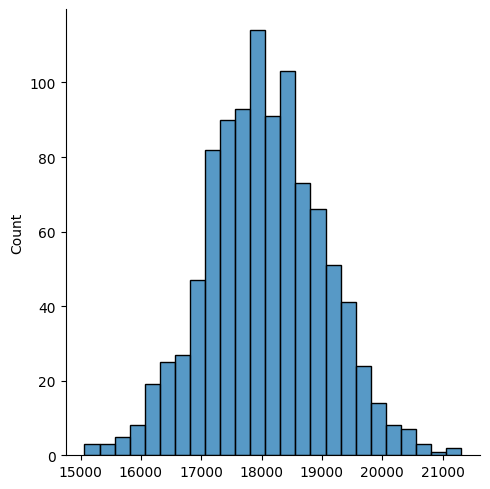

In [26]:
sns.displot(random_solution_stats);

In [27]:
solutions = {"example": {"cost": calculate_costs(example_problem, random_solution), "solution": random_solution, "time": run_time}}

In [28]:
for param in dataset_data_params:
    number, operations, sub_operations, cities = param
    p = Problem.from_dataset(number, operations, sub_operations, cities)
    start = time()
    random_solution = random_solver.solve(p)
    run_time = time() - start

    solutions[f"{operations},{sub_operations},{cities}-{number}"] = {"cost": calculate_costs(p, random_solution), 
                                                                     "solution": random_solution, 
                                                                     "time": run_time}

In [29]:
df_result = pd.DataFrame(solutions).T
df_result

,cost,solution,time
example,16878.957568,"{'Operation1': {'Subtask1': 'Erfurt', 'Subtask...",0.005291
"5,10,10-1",12439.931906,"{'Operation1': {'Sub-operation3': 'city10', 'S...",0.003567
"5,10,10-2",15300.027177,"{'Operation1': {'Sub-operation1': 'city6', 'Su...",0.005154
"5,10,10-3",18722.23342,"{'Operation1': {'Sub-operation1': 'city9', 'Su...",0.00494
"5,5,5-1",4225.779499,"{'Operation1': {'Sub-operation3': 'city1', 'Su...",0.001992
"5,5,5-2",7418.640281,"{'Operation1': {'Sub-operation1': 'city2', 'Su...",0.004234
"5,5,5-3",9196.867503,"{'Operation1': {'Sub-operation1': 'city5', 'Su...",0.002781
"10,10,10-1",25788.26549,"{'Operation1': {'Sub-operation3': 'city5', 'Su...",0.00752
"10,10,10-2",30311.173586,"{'Operation1': {'Sub-operation1': 'city6', 'Su...",0.011885
"10,10,10-3",31034.361477,"{'Operation1': {'Sub-operation1': 'city6', 'Su...",0.009773


In [30]:
df_result.to_csv("../data/solutions/random.csv", index=True)

### Greedy

In [32]:
greedy_solver = GreedySolver()
start = time()
greedy_solution = greedy_solver.solve(example_problem)
run_time = time() - start
greedy_solution, run_time

({'Operation1': {'Subtask1': 'Hannover',
   'Subtask2': 'Dresden',
   'Subtask4': 'Frankfurt',
   'Subtask5': 'Hamburg',
   'Subtask6': 'Berlin',
   'Subtask8': 'Munich',
   'Subtask9': 'Stuttgart',
   'Subtask10': 'Bremen'},
  'Operation2': {'Subtask1': 'Hannover',
   'Subtask3': 'Dresden',
   'Subtask4': 'Frankfurt',
   'Subtask6': 'Berlin',
   'Subtask7': 'Hannover',
   'Subtask9': 'Stuttgart',
   'Subtask10': 'Bremen'},
  'Operation3': {'Subtask1': 'Hannover',
   'Subtask4': 'Frankfurt',
   'Subtask5': 'Hamburg',
   'Subtask6': 'Berlin',
   'Subtask7': 'Hannover',
   'Subtask8': 'Munich',
   'Subtask10': 'Bremen'},
  'Operation4': {'Subtask1': 'Hannover',
   'Subtask2': 'Dresden',
   'Subtask3': 'Dresden',
   'Subtask4': 'Frankfurt',
   'Subtask8': 'Munich',
   'Subtask9': 'Stuttgart',
   'Subtask10': 'Bremen'},
  'Operation5': {'Subtask1': 'Hannover',
   'Subtask2': 'Dresden',
   'Subtask3': 'Dresden',
   'Subtask4': 'Frankfurt',
   'Subtask5': 'Hamburg',
   'Subtask6': 'Berlin',


In [33]:
calculate_costs(example_problem, greedy_solution)

np.float64(8783.34739008165)

In [34]:
solutions = {"example": {"cost": calculate_costs(example_problem, greedy_solution), "solution": greedy_solution, "time": run_time}}

In [35]:
for param in dataset_data_params:
    number, operations, sub_operations, cities = param
    p = Problem.from_dataset(number, operations, sub_operations, cities)
    start = time()
    greedy_solution = greedy_solver.solve(p)
    run_time = time() - start

    solutions[f"{operations},{sub_operations},{cities}-{number}"] = {"cost": calculate_costs(p, greedy_solution), 
                                                                     "solution": greedy_solution, 
                                                                     "time": run_time}

In [36]:
df_result = pd.DataFrame(solutions).T
df_result

,cost,solution,time
example,8783.34739,"{'Operation1': {'Subtask1': 'Hannover', 'Subta...",0.010807
"5,10,10-1",4702.716728,"{'Operation1': {'Sub-operation3': 'city1', 'Su...",0.00489
"5,10,10-2",6711.654478,"{'Operation1': {'Sub-operation1': 'city10', 'S...",0.006272
"5,10,10-3",6932.875653,"{'Operation1': {'Sub-operation1': 'city10', 'S...",0.006191
"5,5,5-1",3189.452273,"{'Operation1': {'Sub-operation3': 'city1', 'Su...",0.002846
"5,5,5-2",6000.718377,"{'Operation1': {'Sub-operation1': 'city2', 'Su...",0.002646
"5,5,5-3",6763.56837,"{'Operation1': {'Sub-operation1': 'city2', 'Su...",0.002488
"10,10,10-1",11784.866093,"{'Operation1': {'Sub-operation3': 'city1', 'Su...",0.009909
"10,10,10-2",13155.581731,"{'Operation1': {'Sub-operation1': 'city10', 'S...",0.012042
"10,10,10-3",12920.165942,"{'Operation1': {'Sub-operation1': 'city10', 'S...",0.012064


In [37]:
df_result.to_csv("../data/solutions/greedy.csv", index=True)